## Minimal example of hearing quantization error in a sampled sinusoid

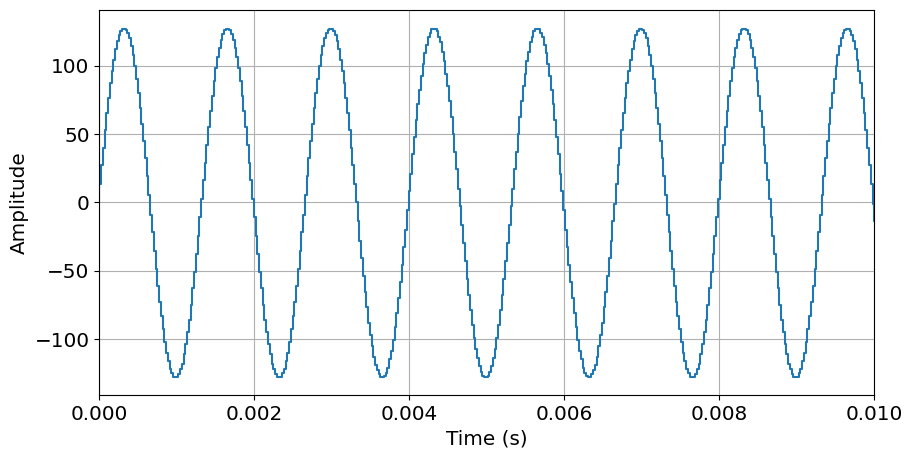

In [90]:
# import some useful libraries
import numpy as np
import matplotlib.pyplot as plt
import simpleaudio as sa

# define parameters of sampling 
Fs = 44100 # samples per second
nbits = 8 # number of bits to quantize <-- experiment with changing this

# define parameters of sinusoid 
amp = 4 # amplitude
freq = 750 # cycles per second
dur = 2 # duration (seconds)

# sample continuous sinusoid
yn = amp*np.sin(2*np.pi*freq*np.arange(0,dur,1/Fs))

# quantize in amplitude using floor (why not use round?)
# we divide by two, i.e., (np.power(2,nbits)/2), because our signal has the range [-1,1]
yn_q = np.floor((np.power(2,nbits)/2)*yn/np.max(np.abs(yn)))

# now for a hacky bit
# we need to send the digital-to-analogue converter 16-bit data
# so we convert our sampled and quantized signal to be 16 bits
yn_q_scaled = np.int16(yn_q/np.max(np.abs(yn_q)) * (np.power(2,16)/2)) # make 16-bit

# let's plot the signal over [0,10] ms
params = {'legend.fontsize': 'x-large','figure.figsize': (10, 5),
     'axes.labelsize': 'x-large','axes.titlesize':'x-large',
     'xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
plt.rcParams.update(params)
fig, ax = plt.subplots()

times = np.arange(len(yn_q))/Fs # time position of each sample index
plt.step(times,yn_q)
plt.xlabel('Time (s)'); plt.ylabel('Quantized Amplitude')
plt.xlim((0,0.01))
ax.grid()
plt.show()


In [91]:
# now let's listen to it
play_obj = sa.play_buffer(y_scaled, 1, 2, Fs)